<a href="https://colab.research.google.com/github/Azelewine/Data-Science/blob/main/Machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business problem**

**Defining the problem:** People are misdiagnosed on a daily basis. With new diseases arising with silimar symptoms, diagosing a patient can go wrong. Also, undergoing so different test to know exactly your disease can be time consuming and expensive. A survey has conducted to concentrate on the risk factors and symptoms associated with heart diseases.

With this information we can predict if someone has a heart disease or not to make diagnosis of heart diseases faster and easier.

**Formulating it as DS/ML:** This is considered as a DS/ML. It involves the use of skills like statistics,Python,Scikit-learn etc.Data science focuses more on extracting information from data whereas machine learning is geared building models to make predictions which are what are both needed for this analysis.

# **Data collection**

**Identifing data sources**

This dataset contains information of individuals and the factors for having  heart disease. The data includes information such as alcohol intake, smoking etc. The target variable indicates whether an individual has heart disease or not.
The client wants to make identification of heart diseases faster and easier and to also prevent misdiagnosis.
This is a supervised learning classification problem.

Column Descriptions:

Age: Age of the individual (years).

Gender: Gender of the individual (Male/Female).

Cholesterol: Cholesterol level in mg/dL.

Blood Pressure: Systolic blood pressure in mmHg.

Heart Rate: Heart rate in beats per minute.

Smoking: Smoking status (Never/Former/Current).

Alcohol Intake: Alcohol intake frequency (None/Moderate/Heavy).

Exercise Hours: Hours of exercise per week.

Family History: Family history of heart disease (Yes/No).

Diabetes: Diabetes status (Yes/No).

Obesity: Obesity status (Yes/No).

Stress Level: Stress level on a scale of 1 to 10.

Blood Sugar: Fasting blood sugar level in mg/dL.

Exercise Induced Angina: Presence of exercise-induced angina (Yes/No).

Chest Pain Type: Type of chest pain experienced (Typical Angina/Atypical Angina/Non-anginal Pain/Asymptomatic).

Heart Disease: Target variable indicating presence of heart disease (0: No, 1: Yes).

This datasets was taken from Kaggle

**Import library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import sklearn.decomposition
import sklearn.svm
from sklearn.naive_bayes import GaussianNB
import sklearn.compose
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV


**Integrating dataset**

In [ ]:
hd = pd.read_csv("heart_disease_dataset.csv")
hd.sample(4)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
631,62,Male,347,136,84,Never,NaN,5,Yes,Yes,No,1,91,Yes,Typical Angina,1
794,70,Female,200,95,74,Former,NaN,8,Yes,Yes,Yes,5,107,No,Non-anginal Pain,0
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
869,51,Male,198,137,69,Never,Heavy,2,No,No,No,6,173,Yes,Asymptomatic,0


**SPLITTING THE DATA INTO TRAINING ,VALIDATION AND TEST SETS**

In [ ]:
#splitting into training and test
#train= tra , test = tes
tra, tes = sklearn.model_selection.train_test_split(hd, test_size=0.2, random_state=25)
tra.shape



(800, 16)

In [ ]:
tes.shape

(200, 16)

# **Data exploration**

In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

The Alcohol Intake column has 340 missing values, which represents a a big portion of the dataset. Handling this missing data is important, the best way to handle it is through imputation.

All other features have no missing values, meaning they are ready for further analysis.

In [ ]:
tra.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,52.000000,248.808750,136.001250,79.151250,4.612500,5.632500,135.743750,0.391250
std,15.707989,58.105744,26.134843,11.412326,2.927124,2.810216,36.475762,0.488335
min,25.000000,150.000000,90.000000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,199.000000,114.000000,70.000000,2.000000,3.000000,106.000000,0.000000
50%,52.000000,244.500000,137.000000,79.000000,5.000000,6.000000,135.500000,0.000000
75%,65.000000,299.000000,159.000000,89.000000,7.000000,8.000000,168.000000,1.000000
max,79.000000,349.000000,179.000000,99.000000,9.000000,10.000000,199.000000,1.000000


**Interpretation**
Cholesterol: The cholesterol levels ranges from 150 mg/dL to 349 mg/dL.

Blood Pressure: blood pressure ranges from 90 mmHg to 179 mmHg. The mean value is 136 mmHg, with a standard deviation of 26.

Heart Rate: From the table above, that heart rate values are more clustered around the mean.

Exercise Hours: The number of exercise hours per week ranges from 0 to 9 hours, with a mean of 4.5 hours.

Stress Level: The standard deviation of 2.8 shows some variability in perceived stress among the dataset's individuals.

Blood Sugar: blood sugar range from 70 mg/dL to 199 mg/dL. The mean blood sugar level is 135 mg/dL, with a standard deviation suggesting a wide range of values.


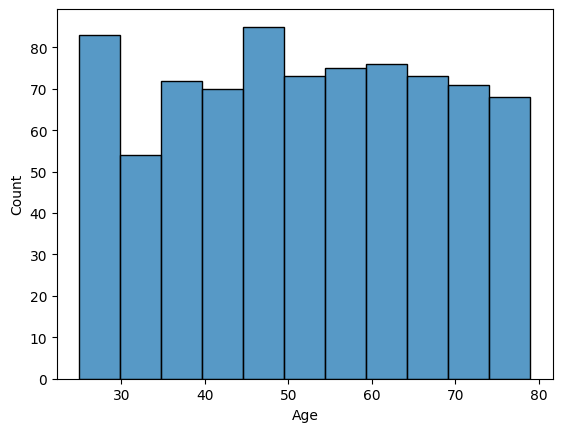

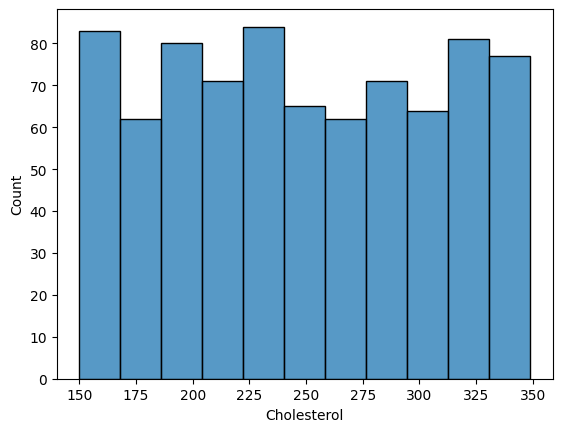

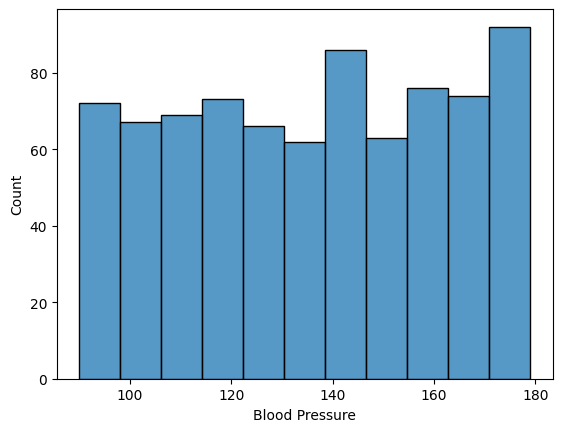

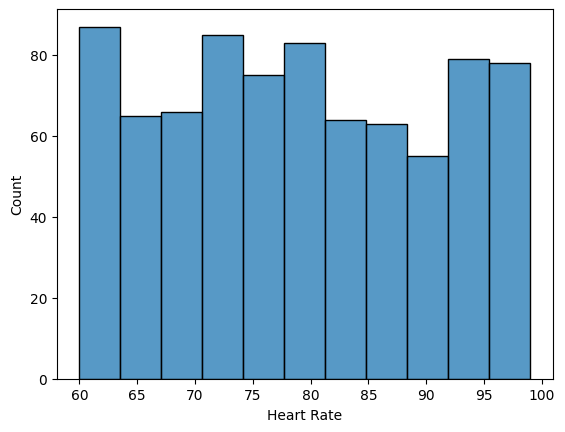

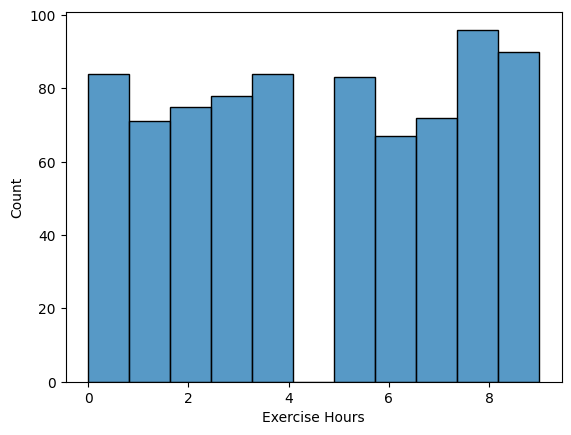

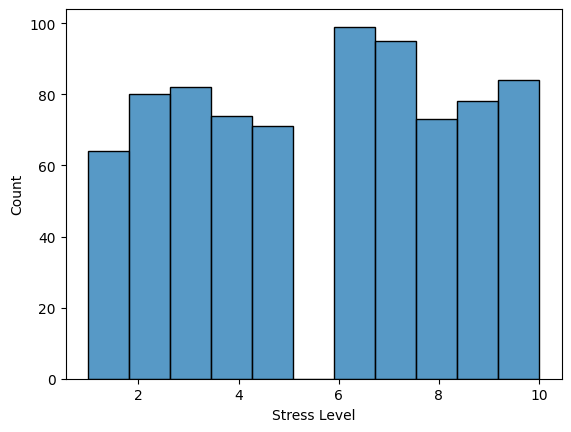

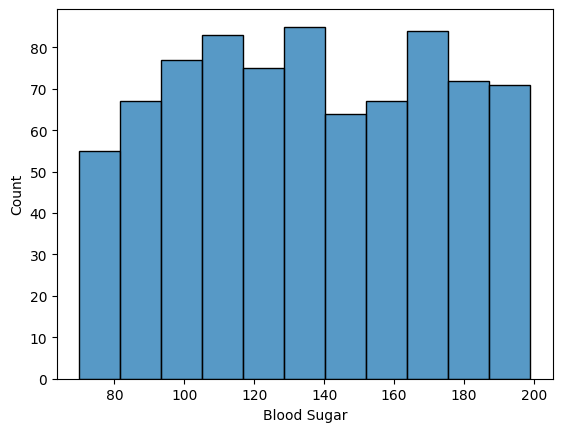

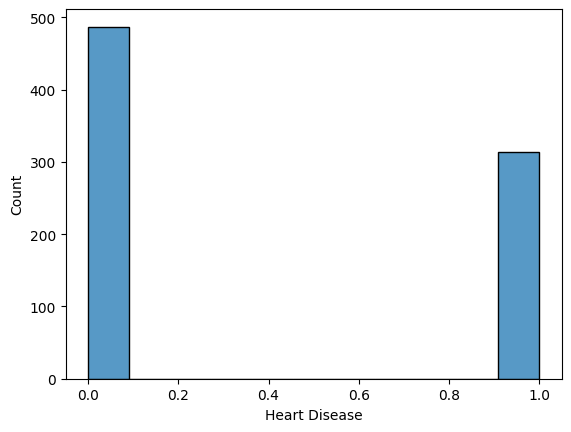

In [ ]:
#to understand the distribution of the data
for e in tra.select_dtypes(include="number").columns:
  sns.histplot(data=tra,x=e)
  plt.show()

In [ ]:
hd["Heart Disease"].unique()

array([1, 0])

In [ ]:
tra["Stress Level"].unique()

array([ 3,  7,  1,  2,  4,  9,  5, 10,  8,  6])

In [ ]:
tra["Heart Disease"].value_counts()

,count
Heart Disease,
0,380
1,260


# **Data Preprocessing**

**DATA CLEANING**

In [ ]:
#finding missing values
tra.isnull().sum()/hd.shape[0]*100

,0
Age,0.0
Gender,0.0
Cholesterol,0.0
Blood Pressure,0.0
Heart Rate,0.0
Smoking,0.0
Alcohol Intake,28.9
Exercise Hours,0.0
Family History,0.0
Diabetes,0.0


In [ ]:
for i in["Alcohol Intake"]:
 tra[i].fillna(hd[i].mode()[0], inplace=True)

 for i in["Alcohol Intake"]:
  tes[i].fillna(hd[i].mode()[0], inplace=True)


In [ ]:
tra.isnull().sum()

,0
Age,0
Gender,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Smoking,0
Alcohol Intake,0
Exercise Hours,0
Family History,0
Diabetes,0


In [ ]:
#check for duplictes
tra.duplicated().sum()
tes.duplicated().sum()


0

# **Feature engineering**

**Feature extraction**

In [ ]:
#Splitting Features and the Target Label
a_tra = tra.drop(["Heart Disease"], axis=1)
b_tra = tra["Heart Disease"]
print("a_tra:", a_tra.shape)
print("b_tra:", b_tra.shape)

a_tes = tes.drop(["Heart Disease"], axis=1)
b_tes = tes["Heart Disease"]
print("a_tes:", a_tes.shape)
print("b_tes:", b_tes.shape)



a_tra: (800, 15)
b_tra: (800,)
a_tes: (200, 15)
b_tes: (200,)


Feature transformation

In [ ]:
#One-Hot Encoding and Standadization


numerical_attributes = a_tra.select_dtypes(include=["int64", "float64"]).columns
categorical_attributes = a_tra.select_dtypes(include="object").columns

ct = sklearn.compose.ColumnTransformer([
    ("standard_scaler", sklearn.preprocessing.StandardScaler(), numerical_attributes),
    ("one_hot_encoder", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), categorical_attributes)
])
ct = ct.fit(a_tra)

a_tra = ct.transform(a_tra)
a_tes = ct.transform(a_tes)

a_tra.shape



(800, 27)

In [ ]:
a_tes.shape

(200, 27)

Dimensionality reduction

In [ ]:
#Dimensionality Reduction
pca = sklearn.decomposition.PCA(n_components=15)
pca.fit(a_tra)

a_tra = pca.transform(a_tra)
a_tes= pca.transform(a_tes)


print("a_train:", a_tra.shape)
print("a_test:", a_tes.shape)


a_train: (800, 15)
a_test: (200, 15)


In [ ]:
#oversampling train dataset
sm = imblearn.over_sampling.SMOTE()
a_tra, b_tra = sm.fit_resample(a_tra, b_tra)
b_tra.value_counts()

,count
Heart Disease,
1,487
0,487


# **Model training and evaluation**

## **Random forest**

In [ ]:
RFC = RandomForestClassifier(random_state=11)
RFC.fit(a_tra, b_tra)

#make prediction on test set
b_predict = RFC.predict(a_tes)

In [ ]:
RFC_Recall = recall_score(b_tes, b_predict)
RFC_Precision = precision_score(b_tes, b_predict)
RFC_f1 = f1_score(b_tes, b_predict)
RFC_accuracy = accuracy_score(b_tes, b_predict)

CM = confusion_matrix(b_tes, b_predict)
print(CM)

[[118   3]
 [ 17  62]]


**Confusion Matrix:**
 The confusion matrix depicts that from 200 cases, 118 were true negatives (correctly identified as not having heart disease), and 62 were true positives (correctly identified as having heart disease). However, there were 3 false positives and 17 false .

In [ ]:
print(classification_report(b_tes, b_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       121
           1       0.95      0.78      0.86        79

    accuracy                           0.90       200
   macro avg       0.91      0.88      0.89       200
weighted avg       0.91      0.90      0.90       200



**Interpretation:**

Accuracy: This indicates that it correctly predicted the presence or absence of heart disease 90% of the time.


Classification Report: The classification report provides precision, recall, and F1-score for both classes. The model performs slightly better in predicting the absence of heart disease (class 0) than its presence (class 1).

In [ ]:
# cross validation
from statistics import stdev
Scores = cross_val_score(RFC, a_tra, b_tra, cv=5, scoring='recall', error_score="raise")
RFC_dv_Scores = Scores.mean()
RFC_dv_stdev = stdev(Scores)
print('cv recall results: {}'.format(Scores))
print('Average cv recall results: ', RFC_dv_Scores)
print('cv recall standard deviation: ', RFC_dv_stdev)

cv recall results: [0.73015873 0.71428571 0.76190476 0.64516129 0.74193548]
Average cv recall results:  0.7186891961085509
cv recall standard deviation:  0.044624177344189005


In [ ]:
abc = [(RFC_Recall, RFC_Precision, RFC_f1, RFC_accuracy)]

RFC_Scores = pd.DataFrame(data = abc, columns=['recall','precision','f1 Score', 'accuracy'])
RFC_Scores.insert(0, 'Model', 'Random Forest')
RFC_Scores

,Model,recall,precision,f1 Score,accuracy
0,Random Forest,0.78481,0.953846,0.861111,0.9


**Interpretation**

Recall score: This means we were able to detect that 78% of peolple with heart disease .

Accuracy: This tells us that the number of correct predictions (heart disease or no heart disease) made by a model in relation to the total number of predictions are 90%.

Precision: This tells us that when our model predicts a person has heart disease we have a 95% chance that the prediction is accurate.

F1 Score: 0.86 tells us how efficient our model is, taking into account both: Recall and Precision scores.

In [ ]:
# Hyperparameter tuning using GridSearch


params = {
    'n_estimators': [110],
    'max_depth': [10],
    'min_samples_split': [3],
    'min_samples_leaf': [2],
    'random_state': [11]
}

gri_RFC = GridSearchCV(RFC, param_grid=params, cv=5, scoring='recall').fit(a_tra, b_tra)

In [ ]:
print('Top parameters:', gri_RFC.best_params_)
print('Top score:', gri_RFC.best_score_)

Top parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 110, 'random_state': 11}
Top score: 0.7409626216077829


In [ ]:
#make predictions on tuned test set
y_predict = gri_RFC.predict(a_tes)

In [ ]:
CM = confusion_matrix(b_tes, b_predict)

gri_RFC_Recall = recall_score(b_tes, b_predict)
gri_RFC_Precision = precision_score(b_tes, b_predict)
gri_RFC_f1 = f1_score(b_tes, b_predict)
gri_RFC_accuracy = accuracy_score(b_tes, b_predict)

print(CM)

[[118   3]
 [ 17  62]]


In [ ]:
#Kfold cross examination
Scores = cross_val_score(gri_RFC, a_tra, b_tra, cv=5, scoring='recall')

In [ ]:
gri_RFC_cv_Scores = Scores.mean()
gri_RFC_cv_stdev = stdev(Scores)

print('cv recall results: {}'.format(Scores))
print('Average cv recall results: ', gri_RFC_cv_Scores)
print('cv recall standard deviation: ', gri_RFC_cv_stdev)

cv recall results: [0.76190476 0.77777778 0.76190476 0.67741935 0.72580645]
Average cv recall results:  0.7409626216077829
cv recall standard deviation:  0.04031115988425883


In [ ]:
abc = [(gri_RFC_Recall, gri_RFC_Precision, gri_RFC_f1, gri_RFC_accuracy)]

gri_RFC_Scores= pd.DataFrame(data = abc, columns=
                        ['recall','precision','f1 score', 'accuracy'])
gri_RFC_Scores.insert(0, 'Model', 'Random Forest after tuning')
gri_RFC_Scores

,Model,recall,precision,f1 score,accuracy
0,Random Forest after tuning,0.78481,0.953846,0.861111,0.9


Recall score is the same

Accuracy: it is the same.

Precision:It is the same, when this model predicts a a person with heart disease we have a 85% chance that the prediction is accurate.

F1 Score: 0.86 the result is the same.

## **kNN**

In [ ]:
#Using kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(a_tra, b_tra)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Make predictions on the test set
b_predict = knn.predict(a_tes)

In [ ]:
b_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0])

In [ ]:
knn_Recall = recall_score(b_tes, b_predict)
knn_Precisions = precision_score(b_tes, b_predict)
knn_f1 = f1_score(b_tes, b_predict)
knn_accuracy = accuracy_score(b_tes, b_predict)

CM = confusion_matrix(b_tes, b_predict)
print(CM)

[[99 22]
 [15 64]]


**Confusion Matrix:** The confusion matrix shows that out of 200 cases, 99 were true negatives (correctly identified as not having heart disease), and 64 were true positives (correctly identified as having heart disease). However, there were 22 false positives and 15 false negatives

In [ ]:
print(classification_report(b_tes, b_predict))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       121
           1       0.74      0.81      0.78        79

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.82       200



**Interpretation:**

Accuracy: This indicates that it correctly predicted the presence or absence of heart disease 81% of the time.


Classification Report: The model performs slightly better in predicting the absence of heart disease (class 0) than its presence (class 1).

In [ ]:
# cross validation
from statistics import stdev
Scores = cross_val_score(knn, a_tra, b_tra, cv=5, scoring='recall', error_score="raise")
knn_dv_Scores = Scores.mean()
knn_dv_stdev = stdev(Scores)
print('cv recall results: {}'.format(Scores))
print('Average cv recall results: ', knn_dv_Scores)
print('cv recall standard deviation: ', knn_dv_stdev)

cv recall results: [0.73015873 0.77777778 0.80952381 0.75806452 0.79032258]
Average cv recall results:  0.773169482846902
cv recall standard deviation:  0.03047616724888864


In [ ]:
abc = [(knn_Recall, knn_Precisions, knn_f1, knn_accuracy)]

knn_Scores = pd.DataFrame(data = abc, columns=['recall','precision','f1 score', 'accuracy'])
knn_Scores.insert(0, 'Model', 'kNN')
knn_Scores

,Model,recall,precision,f1 score,accuracy
0,kNN,0.810127,0.744186,0.775758,0.815


**Interpretation**

Recall score: This means we were able to detect that 81% of peolple with heart disease .

Accuracy: This tells us that the number of correct predictions (heart disease or no heart disease) made by a model in relation to the total number of predictions are 81%, which is not good enough.

Precision: This tells us that when our model predicts a person has heart disease we have a 74% chance that the prediction is accurate.

F1 Score: 0.77 tells us how efficient our model is, taking into account both: Recall and Precision scores.

In [ ]:
 # Hyperparameter tuning using GridSearch
knn = KNeighborsClassifier()

params = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

gri_knn = GridSearchCV(knn, param_grid=params, cv=5, scoring='recall').fit(a_tra, b_tra)

In [ ]:
print('Top parameters:', gri_knn.best_params_)
print('Top score:', gri_knn.best_score_)

Top parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Top score: 0.8114695340501793


In [ ]:
# Make predictions on tuned test set
b_predict = gri_knn.predict(a_tes)

In [ ]:
CM = confusion_matrix(b_tes, b_predict)

gri_knn_Recall = recall_score(b_tes, b_predict)
gri_knn_Precision = precision_score(b_tes, b_predict)
gri_knn_f1 = f1_score(b_tes, b_predict)
gri_knn_accuracy = accuracy_score(b_tes, b_predict)


print(CM)

[[106  15]
 [ 17  62]]


In [ ]:
#Kfold cross examination
Scores = cross_val_score(gri_knn, a_tra, b_tra, cv=5, scoring='recall')
gri_knn_cv_score = Scores.mean()
gri_knn_cv_stdev = stdev(Scores)

print('cv recall results: {}'.format(Scores))
print('Average cv recall results: ', gri_knn_cv_score)
print('cv recall standard deviation: ', gri_knn_cv_stdev)

cv recall results: [0.82539683 0.79365079 0.80952381 0.75806452 0.80645161]
Average cv recall results:  0.7986175115207373
cv recall standard deviation:  0.025331136245321864


In [ ]:
abc = [(gri_knn_Recall, gri_knn_Precision, gri_knn_f1, gri_knn_accuracy)]

gri_knn_scores = pd.DataFrame(data = abc, columns=
                        ['recall','precision','f1 score', 'accuracy'])
gri_knn_scores.insert(0, 'Model', 'kNN after tuning')
gri_knn_scores

,Model,recall,precision,f1 score,accuracy
0,kNN after tuning,0.78481,0.805195,0.794872,0.84


**Interpretation**

Recall score is worse. It was 81% but now 78%

Accuracy is has increased. it was 81% but now 84%

Precision is better, was 74% but now 80%

F1 Score is has also increased to 0.79.

## **Naive Bayes**

In [ ]:
NB =GaussianNB()
NB = NB.fit(a_tra, b_tra)

In [ ]:
# Make predictions on the test set
b_predict = NB.predict(a_tes)
print(classification_report(b_tes, b_predict))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       121
           1       0.90      0.84      0.87        79

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



Interpretation:

Accuracy: This shows that it correctly predicts the presence or absence of heart disease 90% of the time.


Classification Report:  The model performs slightly better in predicting the absence of heart disease (class 0) than its presence (class 1).

In [ ]:
NB_Recall = recall_score(b_tes, b_predict)
NB_Precision = precision_score(b_tes, b_predict)
NB_f1 = f1_score(b_tes, b_predict)
NB_accuracy = accuracy_score(b_tes, b_predict)

CM = confusion_matrix(b_tes, b_predict)
print(CM)

[[114   7]
 [ 13  66]]


In [ ]:
# cross validation
from statistics import stdev
Scores = cross_val_score(NB, a_tra, b_tra, cv=5, scoring='recall', error_score="raise")
NB_dv_Scores = Scores.mean()
NB_dv_stdev = stdev(Scores)
print('cv recall results: {}'.format(Scores))
print('Average cv recall results: ', NB_dv_Scores)
print('cv recall standard deviation: ', NB_dv_stdev)

cv recall results: [0.80952381 0.79365079 0.79365079 0.79032258 0.74193548]
Average cv recall results:  0.7858166922683052
cv recall standard deviation:  0.025644868775174547


In [ ]:
abc = [(NB_Recall, NB_Precision, NB_f1, NB_accuracy)]

NB_scores = pd.DataFrame(data = abc, columns=['recall','precision','f1 score', 'accuracy'])
NB_scores.insert(0, 'Model', 'Naive Bayes')
NB_scores

,Model,recall,precision,f1 score,accuracy
0,Naive Bayes,0.835443,0.90411,0.868421,0.9


**Interpretation**

Recall score: This means we were able to detect that 83% of peolple with heart disease .

Accuracy: This tells us that the number of correct predictions (heart disease or no heart disease) made by a model in relation to the total number of predictions are 90%.

Precision: This tells us that when our model predicts a person has heart disease we have a 90% chance that the prediction is accurate.

F1 Score: 0.86 tells us how efficient our model is, taking into account both: Recall and Precision scores.

In [ ]:
# Hyperparameter tuning using GridSearch

from sklearn.model_selection import GridSearchCV

params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}


gri_NB = GridSearchCV(NB, param_grid=params, cv=5, scoring='recall').fit(a_tra, b_tra)

In [ ]:
print('Top parameters:', gri_NB.best_params_)
print('Top score:', gri_NB.best_score_)

Top parameters: {'var_smoothing': 1e-09}
Top score: 0.7858166922683052


In [ ]:
# Make predictions on tuned test set
y_predict = gri_RFC.predict(a_tes)

In [ ]:
CM = confusion_matrix(b_tes, b_predict)

gri_NB_Recall = recall_score(b_tes, b_predict)
gri_NB_Precision = precision_score(b_tes, b_predict)
gri_NB_f1 = f1_score(b_tes, b_predict)
gri_NB_accuracy = accuracy_score(b_tes, y_predict)

print(CM)

[[108  13]
 [  5  74]]


In [ ]:
#Kfold cross examination
Scores = cross_val_score(gri_NB, a_tra, b_tra, cv=5, scoring='recall')

In [ ]:
gri_NB_cv_score = Scores.mean()
gri_NB_cv_stdev = stdev(Scores)

print('cv recall results: {}'.format(Scores))
print('Average cv recall results: ', gri_NB_cv_score)
print('cv recall standard deviation: ', gri_NB_cv_stdev)

cv recall results: [0.80952381 0.79365079 0.79365079 0.79032258 0.74193548]
Average cv recall results:  0.7858166922683052
cv recall standard deviation:  0.025644868775174547


In [ ]:
abc = [(gri_NB_Recall, gri_NB_Precision, gri_NB_f1, gri_NB_accuracy)]

gri_NB_score = pd.DataFrame(data = abc, columns=
                        ['recall','precision','f1 score', 'accuracy'])
gri_NB_score.insert(0, 'Model', 'Naive Bayes after tuning')
gri_NB_score

,Model,recall,precision,f1 score,accuracy
0,Naive Bayes after tuning,0.936709,0.850575,0.891566,0.875


The values for recall increases to 93%
The precision drops down to 85%
The f1 score increases to 0.89.
the accuracy drops to 87%

## **Logistic Regression**

In [ ]:
LR = LogisticRegression(solver='liblinear')
LR.fit(a_tra, b_tra)

# Make predictions on the test set
LR_Recall = recall_score(b_tes, b_predict)
LR_Precision = precision_score(b_tes, b_predict)
LR_f1 = f1_score(b_tes, b_predict)
LR_accuracy = accuracy_score(b_tes, b_predict)

CM = confusion_matrix(b_tes, b_predict)
print(CM)
classification_rep = classification_report(b_tes, b_predict)

print("Classification Report:")
print(classification_rep)

[[114   7]
 [ 13  66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       121
           1       0.90      0.84      0.87        79

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



Accuracy: This tells us that the number of correct predictions (heart disease or no heart disease) made by a model in relation to the total number of predictions are 90%.

Confusion Matrix: The confusion matrix shows that out of 200 cases, 114 were true negatives (correctly identified as not having heart disease), and 66 were true positives (correctly identified as having heart disease). However, there were 7 false positives and 13 false negatives.

Classification Report:  The model performs slightly better in predicting the absence of heart disease (class 0) than its presence (class 1).

In [ ]:
# cross validation
from statistics import stdev
Scores = cross_val_score(LR, a_tra, b_tra, cv=5, scoring='recall', error_score="raise")
LR_dv_Scores = Scores.mean()
LR_dv_stdev = stdev(Scores)
print('cv recall results: {}'.format(Scores))
print('Average cv recall results: ', LR_dv_Scores)
print('cv recall standard deviation: ', LR_dv_stdev)

cv recall results: [0.82539683 0.85714286 0.85714286 0.77419355 0.74193548]
Average cv recall results:  0.8111623143881209
cv recall standard deviation:  0.05145407090499813


In [ ]:
abc = [(LR_Recall, LR_Precision, LR_f1, LR_accuracy)]

LR_scores = pd.DataFrame(data = abc, columns=['recall','precision','f1 score', 'accuracy'])
LR_scores.insert(0, 'Model', 'Logistic Regression')
LR_scores

,Model,recall,precision,f1 score,accuracy
0,Logistic Regression,0.835443,0.90411,0.868421,0.9


**Interpretation**

Recall score: This means we were able to detect that 83% of peolple with heart disease .

Accuracy: This tells us that the number of correct predictions (heart disease or no heart disease) made by a model in relation to the total number of predictions are 90%.

Precision: This tells us that when our model predicts a person has heart disease we have a 90% chance that the prediction is accurate.

F1 Score: 0.86 tells us how efficient our model is, taking into account both: Recall and Precision scores.

In [ ]:
#hyperparamer tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Set up GridSearchCV
gri_LR = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
gri_LR.fit(a_tra, b_tra)

# Best parameters and best score
print(f"Top Parameters: {gri_LR.best_params_}")
print(f"Top Accuracy: {gri_LR.best_score_}")

Top Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Top Accuracy: 0.86625


In [ ]:
# Make predictions on the test set
y_predict = gri_LR.predict(a_tes)

In [ ]:
CM = confusion_matrix(b_tes, b_predict)

gri_LR_Recall = recall_score(b_tes, b_predict)
gri_LR_Precision = precision_score(b_tes, b_predict)
gri_LR_f1 = f1_score(b_tes, b_predict)
gri_LR_accuracy = accuracy_score(b_tes, y_predict)

print(CM)

[[114   7]
 [ 13  66]]


In [ ]:
#Kfold cross examination
Scores = cross_val_score(gri_LR, a_tra, b_tra, cv=5, scoring='recall')

In [ ]:
gri_LR_cv_score = Scores.mean()
gri_LR_cv_stdev = stdev(Scores)

print('cv recall results: {}'.format(Scores))
print('Average cv recall results: ', gri_LR_cv_score)
print('cv recall standard deviation: ', gri_LR_cv_stdev)

cv recall results: [0.84126984 0.82539683 0.85714286 0.79032258 0.74193548]
Average cv recall results:  0.8112135176651305
cv recall standard deviation:  0.04596175107538001


In [ ]:
abc = [(gri_LR_Recall, gri_LR_Precision, gri_LR_f1, gri_LR_accuracy)]

gri_LR_score = pd.DataFrame(data = abc, columns=
                        ['recall','precision','f1 score', 'accuracy'])
gri_LR_score.insert(0, 'Model', 'Logistic Regression after tuning')
gri_LR_score

,Model,recall,precision,f1 score,accuracy
0,Logistic Regression after tuning,0.835443,0.90411,0.868421,0.87


**Interpretation**

Recall score: remains the same. This means we were able to detect that 93% of peolple with heart disease .

Accuracy: has reduced to 87%

Precision: Remains the same. This tells us that when our model predicts a person has heart disease we have a 85% chance that the prediction is accurate.

F1 Score: remains the same. 0.86 tells us how efficient our model is, taking into account both: Recall and Precision scores.

# **Selecting best model**

To select the best model we compare the models before and after hypertuning.
For randon forest the results after tuning is best.
for kNN the resluts before tuning is best.
for naive bayes the results after tuning is goood.
for logistic regression the results before tuning is good.

In [ ]:
#select the best algorithm between before and after hypertuning to choose which model is best and which hyperparameters is best
best_model = pd.concat([gri_RFC_Scores, gri_knn_scores, NB_scores, LR_scores], ignore_index=True, sort=False)
best_model.sort_values(by=['accuracy'], ascending=False)

,Model,recall,precision,f1 score,accuracy
0,Random Forest after tuning,0.784810,0.953846,0.861111,0.90
2,Naive Bayes,0.835443,0.904110,0.868421,0.90
3,Logistic Regression,0.835443,0.904110,0.868421,0.90
1,kNN after tuning,0.784810,0.805195,0.794872,0.84


From the above, Naive Bayes is the best model in terms of recall, precision, f1 score and accuracy

**Precision-Recall Curve (PR curve) for the best algorithm**

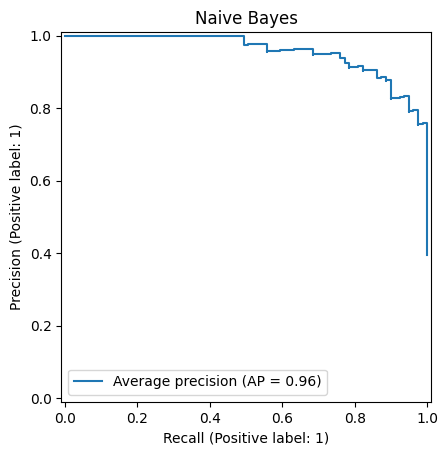

In [ ]:

display = PrecisionRecallDisplay.from_estimator(
    NB, a_tes, b_tes, name="Average precision")
_ = display.ax_.set_title("Naive Bayes")

The precision-recall curve shows the tradeoff between precision and recalls for different thresholds.

# **Conclusion**




**Limitations**

1.The missing data could affect the validation of the results.

2.Given the medical context of this problem, where the cost of false negatives (failing to predict heart disease) could be significant.



**Implications**

1.Both Naive Bayes vs Logistic Regression models perform identically across all metrics.When high call is critical, these models are suitable.

2.Random Forest (after tuning) makes fewer false positive predictions. But comparing it to that Naive Bayes and Logistic Regression, the recall is lower showing that it may miss more true positives. It's a good model if the cost of false positives is higher than false negatives.

3.kNN(after tuning): This model has the weakest performance, producing more false positives and having a lower accuracy. It is not be the best option.

**Recommendation**

1.If wanting to ensure that you do not miss positive cases Naive Bayes and logistic Regresion is the best since both have the highest recall.

2.If wanting to ensure you have fewer false positives, Random Forest is the best option

3.kNN been the weakest performer in terms of metrics, should be avoided.
Focusing on improving recall for the heart disease class would be crucial in a real-world application.

4.Further improvements can be made, possibly through more sophisticated feature engineering or exploring other advanced algorithms.

# **References**

1. scikit-learn
2. https://github.com/MohamedELfeky44/Iris-flower-classification
3. https://www.kaggle.com/datasets/rashadrmammadov/heart-disease-prediction